In [7]:
import pandas as pd
import numpy as np

from ape import chain, Contract, networks

In [8]:
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [9]:
PATH = "../scripts/results/CurveV2LPRunner_16048833_-1_300.csv"

In [10]:
df = pd.read_csv(PATH)

In [11]:
df

,number,value,D,total_supply,balances0,balances1,balances2,A_gamma0,A_gamma1,A_gamma2,A_gamma3,prices0,prices1
0,16048834,2965312450706,145591081457247749164755324,175838661986383773807349,48373063351835,299580890894,40598668028660540586586,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16297689178988374034754,1192423220185360871045
1,16049134,2968188540761,145417948935173028985378095,175480137184867743690848,48607770939651,298285584020,40331320833200582814602,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16302995486735674267552,1195483187819256758945
2,16049434,2975632292085,145743006192447861176762635,175435880949649169052300,48545592907631,298821750750,40280046340132380966427,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16339621879018441786765,1201804287151154451121
3,16049734,2969430089096,145579944963053336029454030,175432417907960972535032,48296713115270,299616425211,40377735156434479877630,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16258334805133342978153,1200279999822092676528
4,16050034,2969574392816,144297799828882961501669089,174056623516088029240734,48229688762490,294701535306,40151143510764369564815,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16252428907123086014166,1200819086722612999420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,16272334,3023342457840,155607115770527661629378803,184905396190780360558873,52364017522055,308726276523,42392208659976055153280,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16807888813672465756741,1223306259998759902689
746,16272634,3031131643118,155753741688232422227302710,184905396190780360558873,52266317628300,309113065870,42419022233544344380677,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16908892362180654183763,1225424980966500097075
747,16272934,3026278540987,155753797414927936742591883,184905403015006335854245,52287710008871,309113065870,42401576769588869077748,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16849667896350266383318,1223832297472083358594
748,16273234,3026065750368,155748940583174623860015024,184899588451285077246695,52275211929212,309113065870,42407809937184431100312,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16841220867582452947132,1224187877605789604721


In [24]:
# adjust for decimals to make calcs/plots easier
df['value_float'] = df['value'].astype(float) / 1e6
df['prices0_float'] = df['prices0'].astype(float) / 1e18
df['prices1_float'] = df['prices1'].astype(float) / 1e18

In [25]:
df

,number,value,D,total_supply,balances0,balances1,balances2,A_gamma0,A_gamma1,A_gamma2,A_gamma3,prices0,prices1,value_float,prices0_float,prices1_float
0,16048834,2965312450706,145591081457247749164755324,175838661986383773807349,48373063351835,299580890894,40598668028660540586586,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16297689178988374034754,1192423220185360871045,2.965312e+06,16297.689179,1192.423220
1,16049134,2968188540761,145417948935173028985378095,175480137184867743690848,48607770939651,298285584020,40331320833200582814602,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16302995486735674267552,1195483187819256758945,2.968189e+06,16302.995487,1195.483188
2,16049434,2975632292085,145743006192447861176762635,175435880949649169052300,48545592907631,298821750750,40280046340132380966427,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16339621879018441786765,1201804287151154451121,2.975632e+06,16339.621879,1201.804287
3,16049734,2969430089096,145579944963053336029454030,175432417907960972535032,48296713115270,299616425211,40377735156434479877630,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16258334805133342978153,1200279999822092676528,2.969430e+06,16258.334805,1200.280000
4,16050034,2969574392816,144297799828882961501669089,174056623516088029240734,48229688762490,294701535306,40151143510764369564815,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16252428907123086014166,1200819086722612999420,2.969574e+06,16252.428907,1200.819087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,16272334,3023342457840,155607115770527661629378803,184905396190780360558873,52364017522055,308726276523,42392208659976055153280,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16807888813672465756741,1223306259998759902689,3.023342e+06,16807.888814,1223.306260
746,16272634,3031131643118,155753741688232422227302710,184905396190780360558873,52266317628300,309113065870,42419022233544344380677,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16908892362180654183763,1225424980966500097075,3.031132e+06,16908.892362,1225.424981
747,16272934,3026278540987,155753797414927936742591883,184905403015006335854245,52287710008871,309113065870,42401576769588869077748,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16849667896350266383318,1223832297472083358594,3.026279e+06,16849.667896,1223.832297
748,16273234,3026065750368,155748940583174623860015024,184899588451285077246695,52275211929212,309113065870,42407809937184431100312,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16841220867582452947132,1224187877605789604721,3.026066e+06,16841.220868,1224.187878


<AxesSubplot: xlabel='number'>

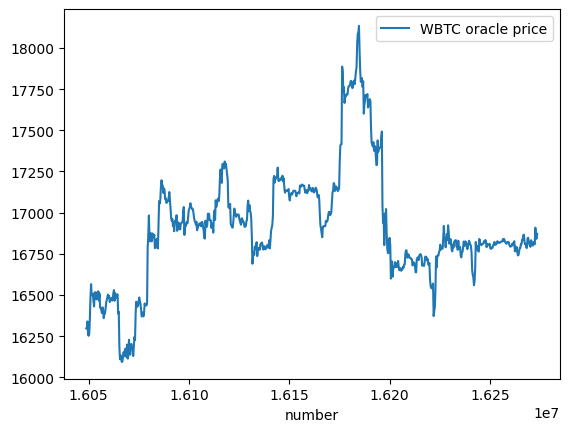

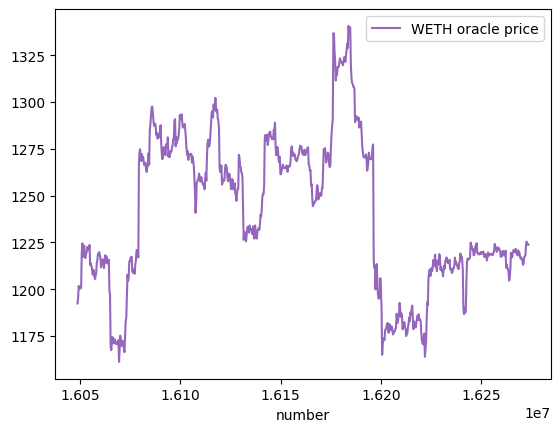

In [32]:
# plot prices of WBTC, WETH from pool.price_oracle() over month of data above
df.plot(x='number', y='prices0_float', label='WBTC oracle price', color='C0')
df.plot(x='number', y='prices1_float', label='WETH oracle price', color='C4')

<AxesSubplot: xlabel='number'>

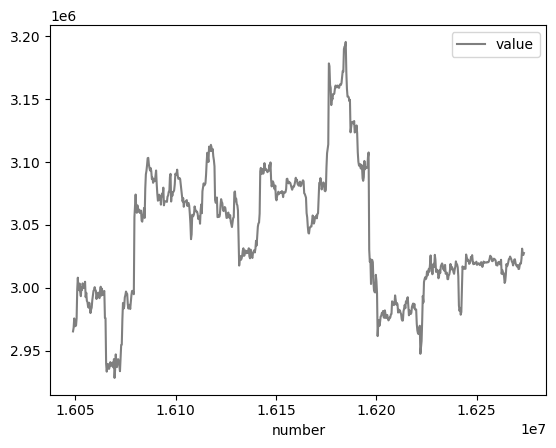

In [44]:
# plot value of LP position over same time
df.plot(x='number', y='value_float', label='value', color='C7')

In [33]:
# convert to fractional change since first point in series
df['d_value_float'] = df['value_float'] / df['value_float'].iloc[0]
df['d_prices0_float'] = df['prices0_float'] / df['prices0_float'].iloc[0]
df['d_prices1_float'] = df['prices1_float'] / df['prices1_float'].iloc[0]

In [34]:
df

,number,value,D,total_supply,balances0,balances1,balances2,A_gamma0,A_gamma1,A_gamma2,A_gamma3,prices0,prices1,value_float,prices0_float,prices1_float,d_value_float,d_prices0_float,d_prices1_float
0,16048834,2965312450706,145591081457247749164755324,175838661986383773807349,48373063351835,299580890894,40598668028660540586586,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16297689178988374034754,1192423220185360871045,2.965312e+06,16297.689179,1192.423220,1.000000,1.000000,1.000000
1,16049134,2968188540761,145417948935173028985378095,175480137184867743690848,48607770939651,298285584020,40331320833200582814602,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16302995486735674267552,1195483187819256758945,2.968189e+06,16302.995487,1195.483188,1.000970,1.000326,1.002566
2,16049434,2975632292085,145743006192447861176762635,175435880949649169052300,48545592907631,298821750750,40280046340132380966427,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16339621879018441786765,1201804287151154451121,2.975632e+06,16339.621879,1201.804287,1.003480,1.002573,1.007867
3,16049734,2969430089096,145579944963053336029454030,175432417907960972535032,48296713115270,299616425211,40377735156434479877630,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16258334805133342978153,1200279999822092676528,2.969430e+06,16258.334805,1200.280000,1.001389,0.997585,1.006589
4,16050034,2969574392816,144297799828882961501669089,174056623516088029240734,48229688762490,294701535306,40151143510764369564815,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16252428907123086014166,1200819086722612999420,2.969574e+06,16252.428907,1200.819087,1.001437,0.997223,1.007041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,16272334,3023342457840,155607115770527661629378803,184905396190780360558873,52364017522055,308726276523,42392208659976055153280,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16807888813672465756741,1223306259998759902689,3.023342e+06,16807.888814,1223.306260,1.019570,1.031305,1.025899
746,16272634,3031131643118,155753741688232422227302710,184905396190780360558873,52266317628300,309113065870,42419022233544344380677,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16908892362180654183763,1225424980966500097075,3.031132e+06,16908.892362,1225.424981,1.022196,1.037502,1.027676
747,16272934,3026278540987,155753797414927936742591883,184905403015006335854245,52287710008871,309113065870,42401576769588869077748,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16849667896350266383318,1223832297472083358594,3.026279e+06,16849.667896,1223.832297,1.020560,1.033869,1.026341
748,16273234,3026065750368,155748940583174623860015024,184899588451285077246695,52275211929212,309113065870,42407809937184431100312,183752478137306770270222288013175834186240000,581076037942835227425498917514114728328226821,1633548703,0,16841220867582452947132,1224187877605789604721,3.026066e+06,16841.220868,1224.187878,1.020488,1.033350,1.026639


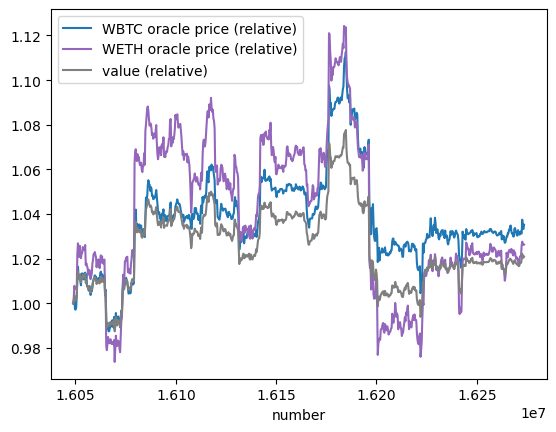

In [78]:
# plot relative values (w.r.t. entry point into pool)
ax = df.plot(x='number', y='d_prices0_float', label='WBTC oracle price (relative)', color='C0')
df.plot(x='number', y='d_prices1_float', label='WETH oracle price (relative)', color='C4', ax=ax)
df.plot(x='number', y='d_value_float', label='value (relative)', color='C7', ax=ax)

fig = ax.get_figure()
fig.savefig('./assets/curve/v2/lp.png')

In [79]:
# Looks pretty correlated with pool token prices as expected.
# How much value accrual in fees less IL tho?
#  - compare vs what LP position would have been if just held respective tokens

In [80]:
amounts = np.array([1000000000000 / 1e6, 5946382600 / 1e8, 820567784927637667840 / 1e18])
amounts

array([1.00000000e+06, 5.94638260e+01, 8.20567785e+02])

In [81]:
start_prices = np.array([1.0, df['prices0_float'].iloc[0], df['prices1_float'].iloc[0]])
start_prices

array([1.00000000e+00, 1.62976892e+04, 1.19242322e+03])

In [82]:
stop_prices = np.array([1.0, df['prices0_float'].iloc[len(df)-1], df['prices1_float'].iloc[len(df)-1]])
stop_prices

array([1.00000000e+00, 1.68717825e+04, 1.22386690e+03])

In [83]:
# holding would have gained only about 2%
np.sum(amounts * stop_prices) / np.sum(amounts * start_prices)

1.0203350941528093

In [84]:
# but LP value gained over the 30d span
df['d_value_float'].iloc[len(df)-1]

1.0210171914875823

In [85]:
lp_yield = df['d_value_float'].iloc[len(df)-1] - np.sum(amounts * stop_prices) / np.sum(amounts * start_prices)
lp_yield

0.0006820973347729797

In [86]:
# Extra 6 bps on the pooled tokens gained in USDT terms
# Does this make sense from UI numbers on Curve?: https://curve.fi/#/ethereum/pools/tricrypto2/deposit

In [87]:
daily_usd_volume = 5.8 * 1e6
lp_fee = 0.00054
liquidity = 155.537 * 1e6

In [88]:
monthly_usd_volume = 30 * daily_usd_volume
monthly_usd_volume

174000000.0

In [89]:
monthly_usd_fees = monthly_usd_volume * lp_fee
monthly_usd_fees

93960.0

In [90]:
# pro-rata share of those fees given 155M pool with user depositing 3M of LP collateral
# is ~1.9% of pool
share = df['value_float'].iloc[0] / liquidity
share

0.01906499707919016

In [91]:
# 1791 USD in profit from trading fees
share * monthly_usd_fees

1791.3471255607076

In [92]:
# yield for the month due to fees is
share * monthly_usd_fees / df['value_float'].iloc[0]

0.0006041006320039606

In [93]:
# looks good!
lp_yield

0.0006820973347729797